## Kapittel 1. Innledning 

Turistskatt er et mye diskutert tema nå for tiden og regjeringen skriver i en pressemeldning (Regjeringen, 2023) at de vil gi kommuner muligheten til å innføre en turistskatt - eller et besøksbidrag som de velger å kalle det. Regjeringen jobber med flere tiltak som skal bidra til en konkurransedyktig, helårlig næring som er bærekraftig og mer lønnsom. Regjeringen vil lansere en handlingsplan for reiselivet før sommeren. Handlingsplanen skal legge føringer for regjeringens prioriteringer og inkludere pilotprosjekter for turistskatt. Populære turistattraksjoner slik som Nordkapp, Beitostølen og Lofoten er alle opp til vurdering. I lys av dette har jeg utredet en analyse av de samfunnsøkonomiske effektene av et slikt inngrep. Utredningen vil fokusere på Lofoten, som har hatt en stor økning i antall turister de siste årene. For at turistskatten skal ha slike hensiktsmessige virkninger må den planlegges godt. Hvordan skatteform er den mest egnede?
Og hvordan skal skatteinntektene forvaltes? Dersom regjeringen misslykkes med en eller flere av disse problemstillingene kan skatten ende opp med å skade turisvirksomhetene, og redusere den samlede velferden. 

#### Hvorfor turistskatt?

En turistskatt kan dekke de negative eksternaliteter forårsaket av turisme. Turisme skaper inntekter for både lokal samfunnet og Norsk økonomi som helhet. Men turisme har også endel negative konsekvenser: Turisme forurenser naturen, skaper press og slitasje på infrastrukturen og undergraver lokal kultur. For å forebygge dette kan myndighetene innføre en skatt på turisme. En skatt på turisme vil generere inntekter, disse inntektene kan brukes til å forbedre goder som er tilknyttet lokal miljøet og reiselivet. Det kan bety bedre tilretteleggelse av aktiviteter, som bidrar til at næringen blir mer helårlig og bærekraftig, samtidig som at lokal samfunnet får dekket de samfunnmessige kostnadene.  

Turistattraksjoner som Lofoten har flere fellesgoder som ikke tilfaller de enkelte næringsvirksomhetene, men som er av betydning for destinasjonenes attraksjons verdi. Tilrettelegging av ulike aktiviteter, informasjon, opplevelser og miljøet på reisemålet er alle viktige faktorer som påvirker opplevelsen av et reisemål. Det er ikke bare reiselivsaktørene som bidrar til den totale opplevelsen. Staten, fylkeskommuner, kommuner, frivillighet bidrar også, alle i ulik grad og på forskjellige måter til å finansiere goder som er tilknyttet reiselivet (Regjeringen, 2023). Fellesgodene har en betydning for reiselivsvirksomehetenes kundegrunnlag og omsetning. Disse godene kan ved hjelp av turistskatt finansieres. 

#### Hvor utbredt er inngrepet andre steder? 

Ifølge FNs sin turistorganisasjon finnes det over 40 ulike skatter mot turistindustrien rundt om i verden. Der overnattingsskatter er den vanligste skatteformen, dette er fordi den er lett å administere og dekker de fleste turister. Turistskatt har blitt mer og mer vanlig i Europa, men likevel finnes det få studier som ser på de samfunnssøkonomiske effektene av et slikt inngrep. 

På Balearicøyne ble det i 2002 innført en turistskatt på overnattinger. Øygruppen består av Mallorca, Menorca, Ibiza og Formentera. På tidlig 2000-tallet mottok øygruppen ca. 8 millioner turister i året. Det bor ca. 800 000 mennesker der. På Mallorca, den mest populære turistdestinasjon, opplevde lokal befolkningen et stort press på infrastrukturen og naturressursene. Grunnvannet sank med 90 meter fra 1975 til 1999 og mengden husholdningsøppel er dobbelt så høyt som gjennomsnittet i resten av Spania. Skatteproveny gikk til å forbedre infrastruktur, opprettholde nasjonalparker, økoturistprosjekter og gjenoppbyggning av jordbruket. Etter et år med skatten overtok at høyre parti (PP) makten på øyene og fjernet skatten. I det samme året skatten ble krevd inn økte antalll britiske turister med 5 prosent til 4 millioner. Om denne veksten hadde vært høyere uten skatten er vanskelig å si. I slike tilfeller vil det være interessant å se på etterspørselselastisiteten, ettersom turister fra ulike økonomiske klasser vil respondere ulikt til prisendringer. Vi antar at familier med dårligere økonomi er tilbøyelig til å endre reisedestinasjon som følge en økning i pris, og at familier fra overklassen er bedre rustet til endringen. Lofoten er betydelig dyrere enn Balearicøyene, til sammenligning vil en overnattingskatt på 10 kroner per person i Lofoten tilsvare  0,7 prosent av det en gjennomsnittlig turist bruker i Norge per døgn, mens en skatt på 1 euro tilsvarer 1,44 prosent av den en turist bruker i Balearicøyene (Mathisen, 2017, s.3).

Utredningen er strukturert slik: I kapittel 2 vil utredningen ta for seg turistnæringen i Norge, med et spesielt fokus på Lofoten. Kapittelet vil i den sammenheng se på antall overnattinger, og hvordan disse har utviklet seg over tid. Kapittelet vil innlede med å gi et overblikk over reiselivs virksomhetene, hvordan konsumet er, og hvor store verdier som skapes. Kapittel 3 vil dreie seg om de samfunnsøkonomiske virkningene av inngrepet, hvordan effekt-og fordelingsvirkning tiltaket har på aktørene, og hvilke forutsetninger som må ligge til for at inngrepet skal fungere hensiksmessig. Kapittel 4 vil innholde en oppsummering av funnene mine og råd til nærings -og fiskeridepartementet. 
 


## Kapittel 2. Turisnæringen i Norge

Turisme er et økonomisk, sosialt og kulturelt fenomen. Turisme blir ifølge The United Nations World Tourism Organization (UNTWO) definert som aktiviteten å reise til steder som er utenfor den vanlige fritidssfæren (Clark et al., 2020, s. 155.). Norge og spesielt Nord-Norge har flere arktiske aspekter deriblant urørt natur, nordlys og midnattssol. Det arktiske klimaet og naturen rundt blir hyppig brukt som turterreng både på sommer og vinter. Disse godene har naturligvis en verdi for både reiselivet og Norge som turistattraksjon. 

Ved økt turisme vil det være samfunnsmessig hensiktsmessig at man balanserer økonomisk vekst med å ivareta natur og kultur. Derfor må reiselivet utnytte ressursene på best mulig måte. I lys av dette har UNTWO arbeidet for å promotere utvikling i bærekraftig turisme. Turisme skal i henhold til «2030 Agenda for Sustainable Development Goals» ivareta det økologiske, opprettholde det kulturelle, og respektere de sosial kulturelle verdiene (Clark, et al., 2020, s. 157). Turisme skaper inntekter, og disse inntektene kan forvaltes slik at de gagner samfunnet i form av sosiale tjenester eller lignende. Miljømessige tiltak vil også være viktig, særlig i arktiske strøk med mye urørt natur og en sårbar urbefolkning. 

Turisme er viktig økonomisk, både fordi det skaper arbeidsplasser og fordi det skaper inntekter. Det er flere virksomheter som livnærer seg på turisme: 
-	Overnattingsvirksomhet som består av hoteller, campingplasser, privat utleie og annen overnatting. De store hotellkjedene dominerer overnattingsbransjen i Norge. 
-	Serveringsvirksomhet som består av restauranter, kafeer, catering barer og puber. 
-	Transportvirksomhet omfatter bedrifter som frakter passasjerer med fly, ferger, jernbane og buss. Disse bedriftene er ofte ikke lokalisert der kundene er. Det er få bedrifter, men store. Som for eksempel Norwegian, SAS, Hurtigruten og Fjord1. 
-	Reisebyrå og reisearrangørvirksomhet som består av reiseguider og ledere eller større aktører som byråer. Disse er ofte sentralisert, men salgsstedene befinner seg der kundene er. 

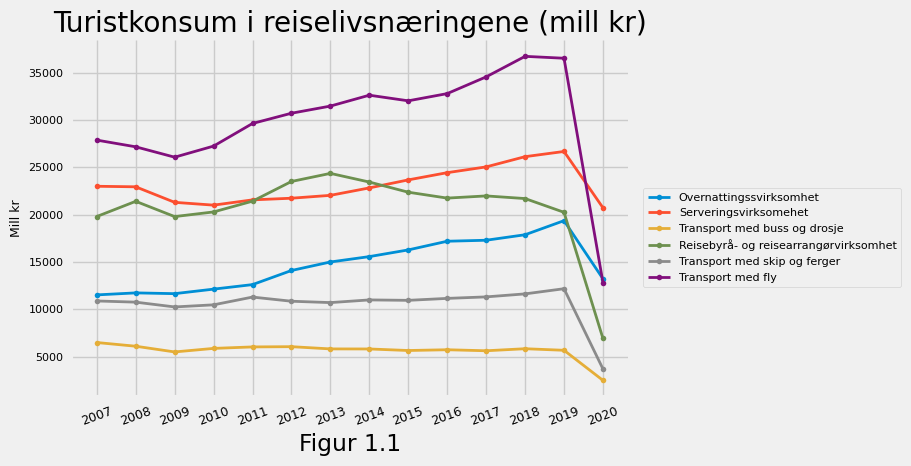

In [175]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
from pyjstat import pyjstat
import sympy as sp

postUrl = 'https://data.ssb.no/api/v0/no/table/10638/'

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "0",
          "01.01",
          "01.02",
          "01.03",
          "01.04",
          "01.05",
          "01.06",
          "01.08"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df_turistkonsum, df_id, ds = apiToDataframe(postUrl, apiQuery)

konsum_ialt = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Turistkonsum i alt')]
konsum_overnatting = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Overnattingstjenester')]
konsum_servering = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Serveringstjenester')]
konsum_transport1 = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Transport med buss og drosje')]
konsum_byrå = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Reisebyrå- og reisearrangørtjenester')]
konsum_transport3 = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Transport med skip og ferger')]
konsum_transport2 = df_turistkonsum.loc[(df_turistkonsum['reiselivsnæring'] == 'Transport med fly')]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(konsum_overnatting['år'],konsum_overnatting['value'], label = 'Overnattingssvirksomhet',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(konsum_servering['år'],konsum_servering['value'], label = 'Serveringsvirksomehet',marker = 'o',markersize = 4, linewidth = 2)
ax.plot(konsum_transport1['år'],konsum_transport1['value'], label = 'Transport med buss og drosje',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(konsum_byrå['år'],konsum_byrå['value'], label = 'Reisebyrå- og reisearrangørvirksomhet',marker = 'o',markersize = 4, linewidth = 2)
ax.plot(konsum_transport3['år'],konsum_transport3['value'], label = 'Transport med skip og ferger',marker = 'o',markersize = 4, linewidth = 2)
ax.plot(konsum_transport2['år'],konsum_transport2['value'], label = 'Transport med fly',marker = 'o', markersize = 4, linewidth = 2)
ax.set_ylabel('Mill kr', size = 9)
ax.set_xlabel('Figur 1.1')
ax.set_title('Turistkonsum i reiselivsnæringene (mill kr)')
ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 
ax.legend(bbox_to_anchor=(1.5,0.6))

plt.style.use('fivethirtyeight');

Figur 1.1 viser turist konsum i reiselivsnæringene. Dette gir oss et godt overblikk over hvilke tjenester turistene konsumerer. De fleste av virksomhetene har i mellom 2007 og 2019 hatt en sterk til svak vekst i konsum. Transport med fly er den virksomheten med størst konsum, som før korona pandemien var på litt i overkant av 35 milliarder kroner. Transport med buss og drosje har det laveste konsumet, som før korona pandemien var på ca. 5,6 milliarder kroner. Det vil være forskjeller i både konsumentgrupper og kundesegmenter. Vi kan dele konsumente inn i tre grupper: Norske husholdninger konsum, utledingenes konsum og Norske yrkesreisendes konsum. Dette blir viktig ettersom vi ønsker at skatten ikke skal tilfalle lokal befolknigen, men turistene. 

Serveringsvirksomheten er dominert av lokal befolkningen, mens overnattingsvirksomhetene er dominert av utledningenskonsum. Overnattingsvirksomhetene har hatt en sterk vekst på ca. 68 prosent over perioden, dette er interessant ettersom det er her virkningen av inngrepet starter. Sammenlignet med de andre reiselivsnæringene har overnattingssvirksomhetene et turistkonsum som ligger litt over gjennomsnittet.

In [44]:

postUrl = "https://data.ssb.no/api/v0/no/table/10603/"

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRJ",
          "TRBSD",
          "TRSF",
          "TRF",
          "RBAV"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df_prod, df_id, ds = apiToDataframe(postUrl, apiQuery)

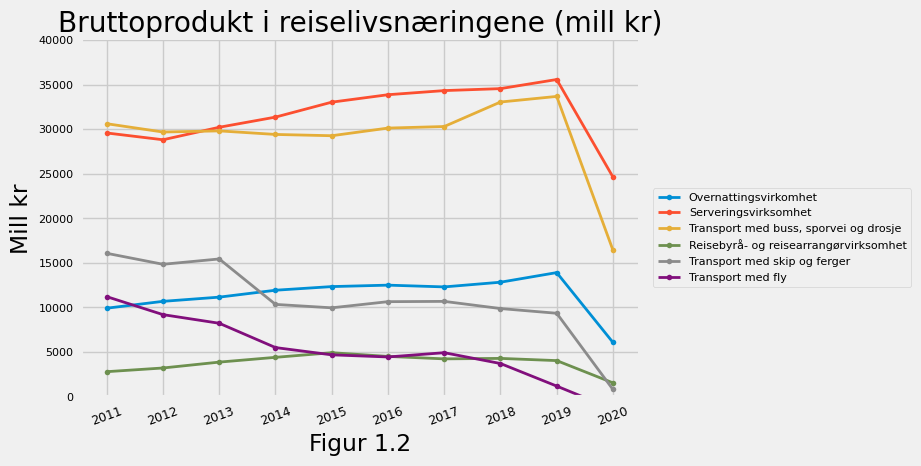

In [170]:
overnatting = df_prod.loc[(df_prod['reiselivsnæring'] == 'Overnattingsvirksomhet') & (df_prod['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
servering = df_prod.loc[(df_prod['reiselivsnæring'] == 'Serveringsvirksomhet') & (df_prod['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
reise_arrangør = df_prod.loc[(df_prod['reiselivsnæring'] == 'Reisebyrå- og reisearrangørvirksomhet') & (df_prod['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_buss = df_prod.loc[(df_prod['reiselivsnæring'] == 'Transport med buss, sporvei og drosje') & (df_prod['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_skip = df_prod.loc[(df_prod['reiselivsnæring'] == 'Transport med skip og ferger') & (df_prod['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]
transport_fly = df_prod.loc[(df_prod['reiselivsnæring'] == 'Transport med fly') & (df_prod['hovedstørrelse'] == 'Bruttoprodukt, basisverdi')]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(overnatting['år'], overnatting['value'], label = 'Overnattingsvirkomhet',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(servering['år'],servering['value'], label = 'Serveringsvirksomhet',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(transport_buss['år'],transport_buss['value'], label = 'Transport med buss, sporvei og drosje',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(reise_arrangør['år'],reise_arrangør['value'], label = 'Reisebyrå- og reisearrangørvirksomhet',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(transport_skip['år'],transport_skip['value'], label = 'Transport med skip og ferger',marker = 'o', markersize = 4, linewidth = 2)
ax.plot(transport_fly['år'],transport_fly['value'], label = 'Transport med fly',marker = 'o', markersize = 4, linewidth = 2)
ax.set_title('Bruttoprodukt i reiselivsnæringene (mill kr)')
ax.set_ylabel('Mill kr')
ax.set_xlabel('Figur 1.2')
ax.set_ylim(0,40000)
ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 

ax.legend(bbox_to_anchor=(1.5,0.6))
plt.style.use('fivethirtyeight');


Figur 1.2 viser bruttoproduksjon til de ulike virksomhetene i reiselivsnæringen. Bruttoproduksjon er salgsinntekter minus kostnadene som går inn i produksjon av produktet. Av figuren ser vi at det skapes store verdier i flere av virksomhetene. Severingsvirksomhetene har størst bruttoproduksjon på ca. 30 milliarder i 2012, mens reisebyrå og arrangør virksomhetene har den minste bruttoproduksjon, som i samme år var på ca. 3 milliarder. Overnattingsvirkomsheten har en bruttoproduksjon på ca. 12 milliarder. Dersom vi utelukker transport med fly, skip og ferger, som har hatt en nedgang i bruttoprodukt, er det vekst i alle virksomhetene knyttet til turisme og reiselivsnæringene. 

Negative eksternaliter oppstår på grunn av at virksomheter optimerer proffitten sin uten å ta hensyn til kostnader som tilfaller samfunnet (Mathisen, 2017). I slike tilfeller er skatt ofte en god løsning. Det optimale vil da være å sette skatten som den marginale kostnanden som påføres samfunnet, tilbudet vil da minke, prisen går opp, og det omsettes et lavere kvantum i markedet. Implikasjonen oppstår på grunn av at fellesgodene ikke omsettes i et marked, og at godene således ikke har noen gitt pris. Det blir dermed vanskelig å beregne eksternalitetene som skyldes turisme. 

In [7]:
postUrl = "https://data.ssb.no/api/v0/no/table/10638/"

apiQuery = {
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK",
          "UTLK",
          "NOHT",
          "NONF"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "01.01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df_konsum, df_id, ds = apiToDataframe(postUrl, apiQuery)

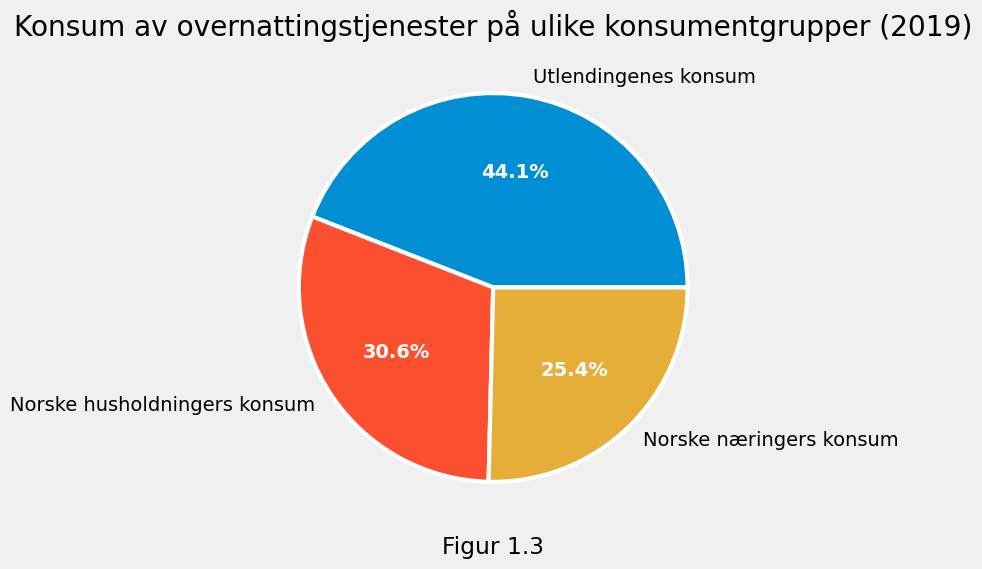

In [177]:
# Bruker verdier for 2019. 
totalkonsum = [19361]
utlendingenes_konsum = 8644/totalkonsum[0]*100
norskehusholdninger_konsum = 5999/totalkonsum[0]*100
norskenæringer_konsum = 4979/totalkonsum[0]*100

slices = [utlendingenes_konsum,norskehusholdninger_konsum,norskenæringer_konsum]
labels = ['Utlendingenes konsum','Norske husholdningers konsum','Norske næringers konsum']

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    slices, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'})
ax.set_title('Konsum av overnattingstjenester på ulike konsumentgrupper (2019)')
ax.set_xlabel('Figur 1.3')
plt.setp(pcts, color='white', fontweight='bold')
plt.style.use('fivethirtyeight');


Det vil også være forskjeller i konsumgrupper og segmenter. Betdyningen av disse vil innen de ulike virksomhetene variere. Figur 1.3 viser turistkonsumet av overnattingstjenester fordelt på 3 konsumentgrupper for året 2019. Norske husholdningers turistkonsum (består av både lokal befolkning og Norsk-turisme innad i Norge), utlendingers- og Norske næringers konsum. Den Norske husholdningens turistkonsum utgjør 30.6 prosent, utlendingenes konsum utgjør 44.1 prosent av konsument, mens Norske næringer eller Norske yrkesreisende utgjør 25.4 prosent. Utlendningens konsum er den viktigste konsumentgruppen for overnattingsvirksomhetene. Ifølge SSB sitt satellittregnskap var den samlede inntekten fra utenlandske gjester i overnattingsvirksomhetene 59 milliarder kroner i 2019 (Jakobsen et al., 2021). 
Norske husholdinger er den viktigste gruppen for serveringsbransjen, der lokal befolkningen er den største konsument. Norske husholdningers turistkonsum dominerer også kundegruppen innen reisebyrå og arrangørvirksomheten, spesielt på grunn av nordmenns pakkereiser til utlandet.

Kundesegmentets betydning, både totalt og innenfor hver av virksomhetene, varierer mellom regionene i Norge. I Nord-Norge står lokalbefolkningen for 20 prosent av omsetning i reiselivet, mens i Oslo er andelen 38 prosent. Utenlandske gjester står for 32 prosent i Nord-Norge, 27 prosent på Vestlandet, mens bare 11 prosent på Sørøstlandet (Jakobsen et al,. 2021, s. 6). 

#### Pilotprosjektet Lofoten

Turismen i Lofoten har økt de siste årene - med unntak av det spesielle korona året 2019 (se Figur 1.3). Fra 2018 til 2019 gikk antall overnattinger på hotell og lignende overnattingsbedrifter opp fra 205 317 til 222 029, en økning med 8.1 prosent. I tillegg økte overnattinger på campingplasser, hyttegrender og vandrerhjem fra 313 951 til 335 144, som utgjør ca. 6.7 prosent. Lofoten er en av de mest poplære reisemålene i Norge. I 2019 er det tilsammen 557 143 overnattinger registert i regionen (SSB), og da er overnattinger igjennom AirBnB ikke tatt med, da disse ikke er registeringspliktig. Figur 1.3 viser utviklingen av overnattinger på campingplasser, hyttregrender og vandrerhjem og hotell og lignende overnattingsbedrifter. 

Lofoten har stort potensial for videre vekst og utvikling, og er allerede godt kjent som turistdestinasjon. Lofoten består av seks kommuner og har litt i overkant av 24 000 innbyggere. Med kun 24 000 innbyggere har ikke Lofoten råd til å tilrettelegge for store mengder turister, og mange ønsker dermed å innføre en turistskatt. Bekymringene er først og fremst løftet frem av lokal befolkningen selv, og av aktørene innen næringene. Særlig siden sommeren 2017 har Lofoten opplevd at det internasjonalt har blitt rettet søkelys på de negative konsekvensene med økende turisme, deriblant: Forsøpling, slitasje på natur, generelet manglende tilrettelegging av fasiliteter villcamping og sikkerhetsutfordringer (Antonsen, 2019).

Den raskt voksende reiselivsnæringen er ressurskrevende, med natur, kultur og lokal befolkning som bærebjelker. Overturisme er et begrep som brukes i en situasjon der "turismen overskrider tersklene for den fysiske, økologiske, sosiale, økonomiske, psykologiske og poltiske kapasiteten til en destinasjon" (Peeters et al, 2018, s. 22). Konsekvense av overturisme utgjør en risiko for reisedestinasjonenes autensitet, og kan resultere i fremmedgjøring for lokalbefolkningen og dårligere opplevelser for turistene i form av tap av natur, kultur og en overbelastet infrastruktur. Mindre kommuner og tettsteder med dårligere infrastruktur er naturligvis mer sårbare for overturisme enn storbyer, ettersom kapasiteten til å ta imot store mengder turister er lavere. Markedsføring igjennom sosiale medier slik som Instagram og TripAdviser bidrar også til at populære reisemål slik som Lofoten mister kontrollen over markedsføringen. 

Bekymringen for overturisme er som nevnt først og fremst trukket frem av lokal befolkningen, som vil senke trykket av turister i regionen. En turistskatt som reduserer antall turister blir dermed aktuelt. Hvordan skatteform som egner seg best er avhengig av hva man ønsker å oppnå. En inngangsskatt vil redusere antall bobil og camping turister, mens en skatt på overnattinger vil redusere antall og lengden på overnattinger på hotell og lignende. Hensikten altså å redusere antallet turister (etterspørselen). I det følgende vil utredningen se nærmere på de samfunnsøkonomiske effektene av en turistskatt. 

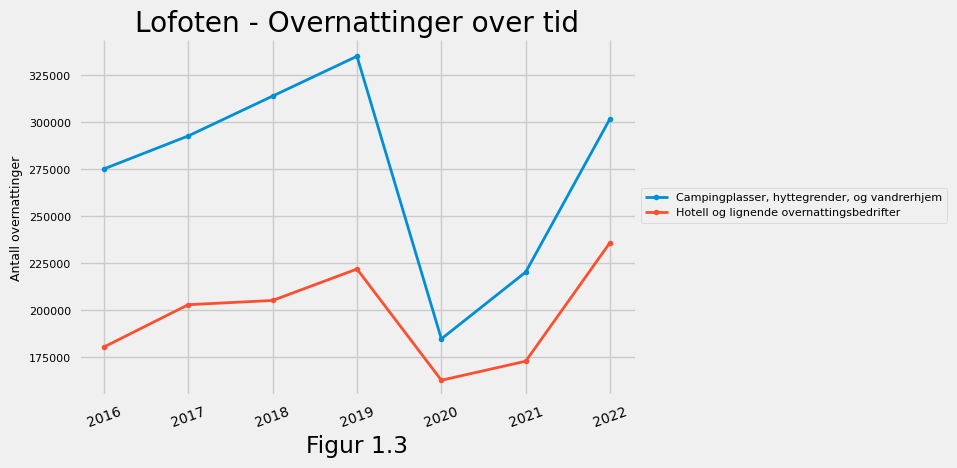

In [188]:
df_overnattinger = pd.read_csv("https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe1/troms_og_lofoten_overnattinger3.csv", sep=",")

df_overnattinger.drop('Unnamed: 0', inplace=True, axis=1)

# Lofoten
lofoten_hotell = df_overnattinger.loc[(df_overnattinger['region'] == 'Lofoten') & (df_overnattinger['innkvarteringstype'] == 'Hotell og liknande overnattingsbedrifter')]
lofoten_camping = df_overnattinger.loc[(df_overnattinger['region'] == 'Lofoten') & (df_overnattinger['innkvarteringstype'] == 'Campingplassar, hyttegrender og vandrarheim')]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.plot(lofoten_camping['Aar'],lofoten_camping['overnattinger'], label = 'Campingplasser, hyttegrender, og vandrerhjem', marker = 'o', markersize = 4, linewidth = 2)
ax.plot(lofoten_hotell['Aar'],lofoten_hotell['overnattinger'], label = 'Hotell og lignende overnattingsbedrifter', marker = 'o', markersize = 4, linewidth = 2)
ax.set_title('Lofoten - Overnattinger over tid')
ax.set_ylabel('Antall overnattinger', size = 9)
ax.set_xlabel('Figur 1.3')

ax.xaxis.set_tick_params(labelsize=10, rotation = 20) 
ax.legend(bbox_to_anchor=(1,0.6));

#### Kapittel 3. Samfunnsøkonomiske effekter av en turistskatt

I markedsøkonomien er vi opptatt av hvordan prisdannelse skjer i et marked. Et annet viktig spørsmål er om markedsløsningen er samfunnsøkonomisk effektiv. Vi ønsker at det samfunnsmessige overskuddet skal bli så høyt som mulig, fordi dette danner høyest mulig velferd. 

I det følgende skal jeg vurdere de samfunnsøkonomiske effektene av en turistskatt. Jeg vil innlede med et generisk eksempel på en turistskatt. Figur 1.5 viser markedslikevekt med og uten en turistskatt. I eksemplet tar jeg utgangspunkt i modellen for fullkommen konkurranse, der aktørene i markedet ikke har markedsmakt - prisen og omsatt mengde blir dannet igjennom et samspill av alle tilbydere og etterspørrere. Denne markedsformen er nyttig å ha som grunnlag for sammenligning med andre markedsformer fordi den sikrer samfunnsøkonomisk effektiv ressursstyring. Selv om markedet for turister kan være ulikt, er det ikke urimelig å anta at markedet i de fleste tilfeller vil reagere ganske likt som et marked med fullkommen konkurranse. Sammenhengen mellom effektiv ressursstyring og velferd er åpenbar: Ønsker samfunnet å få mest mulig velferd ut av de ressursene som er tilgjengelig, må ressursene utnyttes samfunnsøkonomisk effektivt. 

I eksemplet tar jeg utganspunkt i en skatt på hotellovernattinger. Med en turistskatt på t som legges på tilbyderene (hotellvirksomhetene) kan vi skrive etterspørsel som en funksjon:

\begin{equation}
   x^{D}= D(p)\tag{1}
\end{equation}

og tilbud:

\begin{equation}
   x^{S}= S(p-t)\tag{2}
\end{equation}

Vi kan forklare tilbud og etterspørselfunksjonene generelt. Etterspørselen er en funksjon av pris. Etterspørselen er fallende, fordi betalingsvilligheten er avtakende. Når prisen er høy, er det færre etterspørrere, dvs mindre kvantum omsatt i markedet. Derfor økes også etterspørselen når prisen går ned, dette skyldes at etterspørrere som tidligere ikke hadde råd til godet nå har råd. 
Vi antar pgså at de som allerede har kjøpt godet ønsker, og er i stand til å kjøpe mer når godet faller i pris. Tilbudet er også en funksjon av pris, der tilbudet øker når prisen øker. Dette kan forklares ved at når prisen øker vil produsentene være til villig til å produsere mer av godet. I figur 1.4 ser vi at likevektspunktet L, er der mengden av varer eller tjenester som blir etterspurt er lik mengden som produseres. I dette punktet får produsentene dekket sine produksjonskostnader og konsumentene betaler det de mener godet er verdt. 

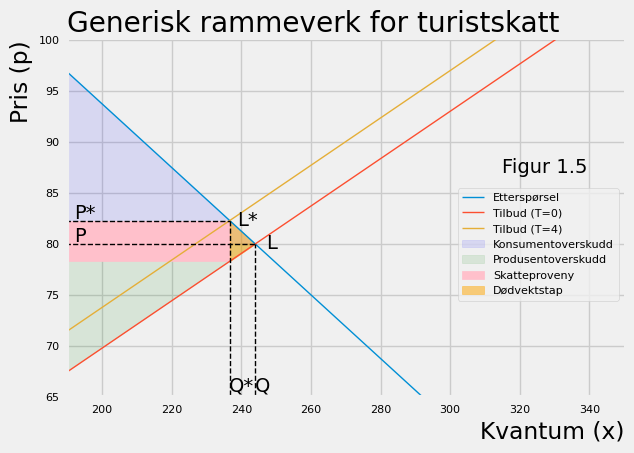

In [186]:
import sympy as sp
import numpy as np

def x_d(p):
    return 500-3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)


x,p,t =sp.symbols('x p t', real=True, positive=True)

# lager ligning 
equ=sp.Eq(x_d(p), x_s(p,t))

# finner likevektspris. 
p_eq = sp.solve(equ,p)
p_eq = 80

# finner likevektskvantum.
x_eq= x_d(p_eq)
x_eq = 244

# ligning med avgift
equ2=sp.Eq(x_d(p), x_s(p,4))

# likevektpris med avgift
p_eq2 = sp.solve(equ2,p)
p_eq2 = float(p_eq2[0])
round(p_eq2,2)

# likevektskvantum med avgift
x_eq2= x_d(p_eq2)
x_eq2 = float(x_eq2)
round(x_eq2,2)

# Lager inverse funksjoner
eqd = sp.Eq(500-3.2*p,x)
eqd_p = sp.solve(eqd,p)
eqs = sp.Eq(-100 + 4.3*(p-t),x)
eqs_p = sp.solve(eqs,p)

# Definerer inversefunksjoner 
def x_d2(x):
    return 156.25 - 0.3125*x

def x_s2(x,t): 
    return t + 0.232558139534884*x + 23.2558139534884

x_num=np.linspace(1,1000,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(190,350))
                ax.set(ylim=(65,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_title('Generisk rammeverk for turistskatt', loc = 'left', size = 'x-large')
                ax.annotate('Figur 1.5',xy=(315,87))

                return fig, ax

fig, ax = create_ax()

ax.plot(x_num,x_d2(x_num), label = 'Etterspørsel', linewidth = 1) # Plotter funksjoner
ax.plot(x_num,x_s2(x_num,0), label = 'Tilbud (T=0)', linewidth = 1)
ax.plot(x_num,x_s2(x_num,4), label = 'Tilbud (T=4)', linewidth = 1)

ax.vlines(x_eq,0,p_eq, color='black',ls='dashed', linewidth = 1)
ax.hlines(p_eq2,0,x_eq2, color='black',ls='dashed', linewidth = 1)
ax.vlines(x_eq2,0,p_eq2, color='black',ls='dashed', linewidth = 1)
ax.hlines(p_eq,0,x_eq, color = 'black', ls = 'dashed', linewidth = 1)

z=np.linspace(60,x_eq,100)
y=np.linspace(60,x_eq2,100)
q=np.linspace(x_eq2,x_eq,100)

ax.fill_between(z,p_eq,x_d2(z),color = "blue",alpha = 0.1,label='Konsumentoverskudd')
ax.fill_between(z,p_eq,x_s2(z,0),color = "green",alpha = 0.1,label='Produsentoverskudd')
ax.fill_between(y,p_eq2-4,p_eq2, color = 'pink',label = 'Skatteproveny')
ax.fill_between(q,x_s2(q,0),x_d2(q), color = "orange", alpha = .5, label = "Dødvektstap" )

#plt.xticks([])
#plt.yticks([])

ax.annotate('Q', xy = (244,65.5))
ax.annotate('Q*', xy = (236.5,65.5))
ax.annotate('P' , xy = (192,80.2))
ax.annotate('P*', xy = (192,82.5))
ax.annotate('L', xy = (247,79.5))
ax.annotate('L*', xy = (238.8,81.8))

ax.legend(bbox_to_anchor=(1,0.6))
#plt.style.use('fivethirtyeight');



#### Konsumenten

Etterspørselen i figur 1.4 er avtakende, og vi tolker dette som at konsumenten sin vilje til å betale for en ekstra enhet også er fallende. 
Etterspørselskurven er derfor rangert etter det vi kaller for konsumentenes fallende marginale betalingsvillighet. Marginal betlingsvillighet er en god indikator på grensenytte (nytten konsumenten får ved å konsumere flere enheter av godet), og samlet betalingsvillighet er en god indikator på den totale nytten. Dvs at jo høyere den samlede betalingsvilligheten er desto høyere vil nytten til konsumenten være. En konsument fortsetter således å kjøpe en ekstra enhet av godet helt til prisen for en ekstra enhet er lik konsumentens betalingsvillighet. Ved å bevege oss nedover langs etterspørselskurven, inkuderer vi etterspørselen fra konsumenter med stadig lavere betalingsvillighet, og utifra dette kan vi si at konsumentene med høyere reservasjonspris enn markedsprisen vil få kjøpt godet til en pris som ligger lavere enn de ellers ville vært vilig til å akseptere. Summen av alle disse besparelsene i markedet fremstår som konsumentoverskuddet (Andreassen ., et al, 2021). I figur 1.4 vises konsumentoverskuddet før avgiften som arelealet mellom prisen P og etterspørselskurven. Om vi kaller samlet betalingsvillighet for B og pris for P, kan konsumentoverskuddet skrives som en funksjon av kvantum Q: 

\begin{equation}
   KO= B(q) - Pq\tag{1}
\end{equation}


#### Produsenten

I likhet med konsumentenoverskuddet kan vil måle produsenten sitt overskuddet. Produsenten vil også tilpasse seg: Produsenten vil tilpasse seg å tilby så mange enheter der grensekostnaden er lik prisen. Tilbudskurven er sammenfallende med grensekostnaden (kostnaden ved å produsere en ekstra enhet). Til en fast pris P vil en produsent med lavere reservasjonspris være villig til å få solgt godet til en pris, som er høyere enn det produsenten ville vært villig til å selge varen for. Produsentoverskuddet er dermed lik summeringen av inntektene til produsentene ved å ta en pris som ligger høyere enn produsenten ville vært villig til å aksepetere. Dette er nært knyttet til produsentenes fortjeneste, med en viktig forskjell: Produsentovetskuddet er lik differasen mellom inntekter fra salget og summen av de variable kostnadene. Om man skal regne produsentens fortjeneste trekker man ifra både variable og faste kostnader. Produsentoverkskuddet inkluderer således inntektene som skal brukes til å finansiere de faste kostnadene. I figur 1.4 vises produsentoverskuddet før avgiften som arealet mellom prisen P og tilbudskurven. 

\begin{equation}
   PO= Pq - C(q)\tag{2}
\end{equation}

Ved å bruke konsumentensoverskuddd og produsentsoverskudd kan vi finne det samfunnsmessigeoverskuddet: 

\begin{equation}
   SO= PO + KO \tag{3}
\end{equation}


#### Virkningen på produsenten og konsumentens velferd

Ved bruk av figur 1.4 kan vi se de generiske virkningene av en turistskatt. Utgangspunktet er forsatt slik: Samfunnet ønsker å utnytte ressursene best mulig, og samfunnets velferd er størst når summen av overskuddet fra konsumentene og produsentene er maksimert. Vi vet at det samfunnsøkonomiske overskuddet er maksimert når marginal betalingsvillighet er lik grensekostnadene som i likevektspunktet L. Vi ser at dersom en turistskatt blir pålagt tilbudssiden, så vil det følge et venstreskift i tilbudet. Dermed ser vi at markedet i figur 1.4 får et nytt likevektspunkt i L*. Vi ser av figuren at det oppstår en kile mellom den prisen som produsentene mottar og den prisen konsumentene betaler. Det er viktig å merke seg at størrelsen på skatten som er brukt i figur 1.4, er mindre enn økningen i pris, og at produsenten derfor ikke klarer å velte hele skatten over på konsumentene. Kilen som oppstår imellom aktørene er inntektene til myndighetene. Skatteprovenyet spiser således opp andeler av overskudd til både produsent og konsument. Konsumenten må betale mer for godene og produsenetene må betale skatteproveny til myndighetene.

En optimal løsning vil være der inntektene fra skatteproveny er lik de marginale samfunnskostnadene som følger av turisme. Dvs at inntektene fra skatten er lik kostnadene turisme påfører lokal miljøet slik som i Lofoten. Dette vil være opitmalt ettersom det reduserer effektsvirkningen på aktørene. Det vil derfor være hensiktsmessig at størrelsen på provenyet er tilnærmet lik de samfunnsøkonimiske kostnadene. Det er ingen garantier for at skatten vil få en slik optimal virkning. 

En av de viktigste driverne til etterspørrselen er pris, og når prisene stiger, vil det å velge en destinasjon som er billigere for etterspørrerne være en naturlig virkning. Dette fører til færre og kortere opphold, og virksomhetene vil miste deler større av overskuddet (omsetningen). Hvor store andeler av omsetningen som produsentene mister, er avhengig av elastisiteten til etterspørselen i markedet. Jo mer elastisk etterspørselen er, altså hvor sensitivt godet er for prisendringer, desto større blir virkningene på virksomhetene i reislivsnæringen. En turistskatt vil slik først ta andeler av overskuddet i proveny, og deretter skape et skift i etterspørselen som skyldes at etterspørrene velger andre turist destinasjoner som er billigere. 

\begin{equation}
   SO(Q*) = PO(Q*) + KO(Q*)\tag{4}
\end{equation}

Vi ser at også at det oppstår et effektivitetstap. Denne reduksjon kalles for dødvektstap og oppstår på grunn av reduksjonen i en gruppe ikke blir kompensert ved overskudd i en annen gruppe. 

\begin{equation}
   Dødvektstap = SO(Q*) - SO(Q)\tag{4}
\end{equation}

#### Forvaltning av skatteinntekter

Selv om konsumentene og produsentene mister andeler av sitt overskudd, som er ugunstig for aktørene i markedet er det ikke nødvendivis slik at den samfunnsmessige velferden blir redusert. Skattebeløpet kan settes inn i alternativ virksomhet som gir positiv nytte. Da er vi kommet til forvaltnignen av turistskatten. NHO argumenterer for at dersom skatteinntektene skal ha en hensiktsmessig virkning, og gange det lokale samfunnet slik som argumentert i kapittel 2, er det vesentlig at inntektene ikke havner i finansdepartementes kasse, eller til erstatning for midler som kommunen i dag bruker på tilrettelegging og vedlikehold (NHO, u.å).


#### Konkurranseulempe 

Gode priser på overnatting er viktig for å kunne tiltrekke turisme, og konkurrere med andre i et internasjonalt marked. Hotellene i Norge har blant Europas høyeste momsnivå på overnatting. Etter merverdiavgiftsloven skal det bergnes 12 prosent på omsetningen av tjenester som gjelder utleie av rom i hotellvirksomhet og lignende virksomhet. En turistskatt lagt på hotell blir som en ekstra overnattingsmom som gjør det enda dyrere. Økte priser vil som vist i figur 1.4 redusere etterspørselen, som kan være en ulempe for den Norske reiselivsnæringen. Reiselivet har nettop vært igjennom en tøff pandemi, noe som har bremset inntjeningen. En turistskatt vil dermed kunne bidra til ytterlige tap av inntekter.  Turistskatten kan også ramme aktørene (produsentene) skeivt. Virksomheten er allerede dominert av de store hotellkjedene. En turistskatt på overnattinger som i utgangspunktet er dyrt fra før av, kan være spesielt ødeleggende for small cap selskaper, selskaper som har mindre markedsandeler og en lavere inntjening. 

## Kapittel 4. Oppsummering og råd til næring -og fiskeridepartementet. 


#### Kildeliste

Antonsen, Karin Marie (2019). Holdninger til turisme blant innbyggerne i Lofoten. Bærekraftig reisemålsutviklng i Lofoten. 
https://s3-eu-west-1.amazonaws.com/morgenbladet.no/sites/l/lofoten.info/files/innbyggerundersoekelse_om_turisme_i_lofoten_2019.pdf

Andreassen, Viggo., Bredesen, Ivar., Thøgersen, Joachim (2021). Innføring i Mikroøkonomi. For økonomisk-administrative stuider (3.utg). Cappelen Damm. 

Derek j. Clark., Moilanen, Mikko., Østbye, Stein (2020). Tourism in the Arctic I The economy of the North. ECONOR (SSB). 
https://www.ssb.no/en/natur-og-miljo/artikler-og-publikasjoner/_attachment/454081?_ts=17bc94cfc98

Regjeringen (2023, 19. Januar). Vurderer destinasjoner for besøksbidrag.
https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954

Jakobsen, Erik., K. Iversen, Endre., Nedrum, live Rødal, Mathie (2021). Reiselivet før, under og etter pandemien. Menon Economics (NHO rapport).   
https://www.nhoreiseliv.no/contentassets/6abc6856aad442bcb91b431d978d6042/rapport-norsk-reiseliv-for-under-og-etter-pandemien.pdf